In [7]:
import pandas as pd

df = pd.read_csv('Fish.csv')

bream_df = df[df['Species'] == 'Bream']

bream_weight = bream_df['Weight'].tolist()
bream_length = bream_df['Length2'].tolist()

smelt_df = df[df['Species'] == 'Smelt']

smelt_weight = smelt_df['Weight'].tolist()
smelt_length = smelt_df['Length2'].tolist()

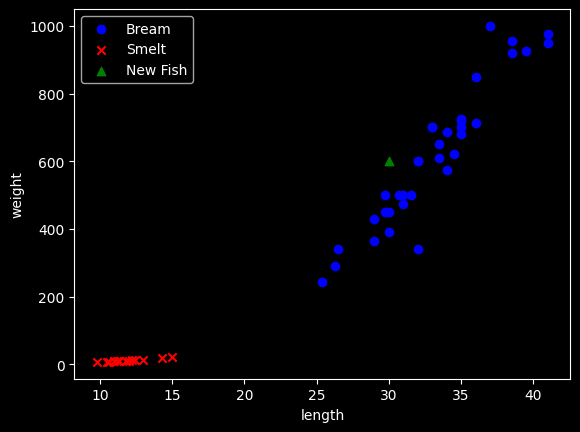

In [25]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight, color='blue', marker='o', label='Bream')
plt.scatter(smelt_length, smelt_weight, color='red', marker='x', label='Smelt')
plt.scatter(30, 600, color='green', marker='^', label='New Fish')
plt.xlabel('length')
plt.ylabel('weight')

plt.legend()
plt.show()

In [10]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

fish_data = [[l, w] for l, w in zip(length, weight)]

fish_target = [1] * 35 + [0] * 14

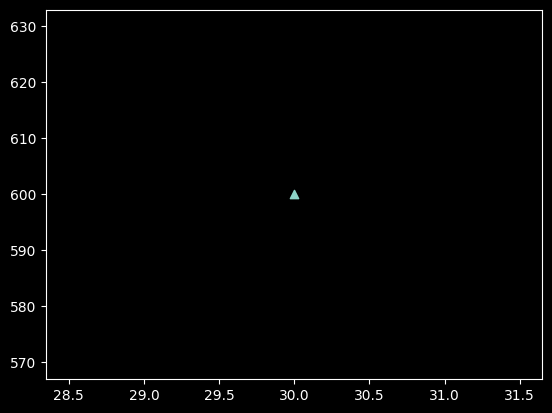

In [23]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

pre = kn.predict([[30,600]])
print(pre)

In [17]:
k5_score = kn.score(fish_data, fish_target)

kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
k49_score = kn49.score(fish_data, fish_target)

print(k49_score)
print(k5_score)

0.7142857142857143
1.0
